## p9
- Can I render maps for 1024 to 100k neurons by imshowing and then drawing ReLu lines in matplotlib?

In [1]:
from manimlib import *
from functools import partial
import sys, cv2 

sys.path.append('../_2025/backprop_3') #Point to folder where plane_folding_utils.py is
sys.path.append('../')
from geometric_dl_utils import *
from geometric_dl_utils_simplified import *
from polytope_intersection_utils import intersect_polytopes
import matplotlib.pyplot as plt
from plane_folding_utils import *

import matplotlib.patches as mp
tab20_colors_mpl = plt.cm.tab20_r.colors

In [2]:
# model_path='../models/one_layer_1024_nuerons_long.pth'
# model = BaarleNet([1024])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[1024, 1024, 2]

model_path='../models/one_layer_10k_neurons_long.pth'
model = BaarleNet([10000])
model.load_state_dict(torch.load(model_path))
viz_scales=[0.07, 0.07, 0.04]
num_neurons=[10000, 10000, 2]


# model_path='../models/one_layer_100k_neurons_long.pth'
# model = BaarleNet([100000])
# model.load_state_dict(torch.load(model_path))
# viz_scales=[0.07, 0.07, 0.04]
# num_neurons=[100000, 100000, 2]

In [3]:
map=cv2.imread('Baarle-Nassau_-_Baarle-Hertog-en no legend.png')[:,:,(2,1,0)]

def viz_descision_boundary(model, res=256, figsize=(6,6)):
    plt.clf()
    fig=plt.figure(0,figsize)
    ax=fig.add_subplot(111)
    
    probe=np.zeros((res,res,2))
    for j, xx in enumerate(np.linspace(-1, 1, res)):
        for k, yy in enumerate(np.linspace(-1, 1, res)):
            probe[j, k]=[yy,xx]
    probe=probe.reshape(res**2, -1)
    with torch.no_grad():
        probe_logits=model(torch.tensor(probe).float())
        probe_logits=probe_logits.detach().numpy().reshape(res,res,2)
        probe_softmax = torch.nn.Softmax(dim=1)(torch.tensor(probe_logits.reshape(-1, 2)))
    
    ax.imshow(map.mean(2), cmap='gray', extent=[-1, 1, -1, 1])
    ax.imshow(np.flipud(np.argmax(probe_logits,2)), 
               extent=[-1, 1, -1, 1],  # This maps to image coordinates
               alpha=0.7,
               cmap='viridis')
    return ax, probe_logits

<Figure size 640x480 with 0 Axes>

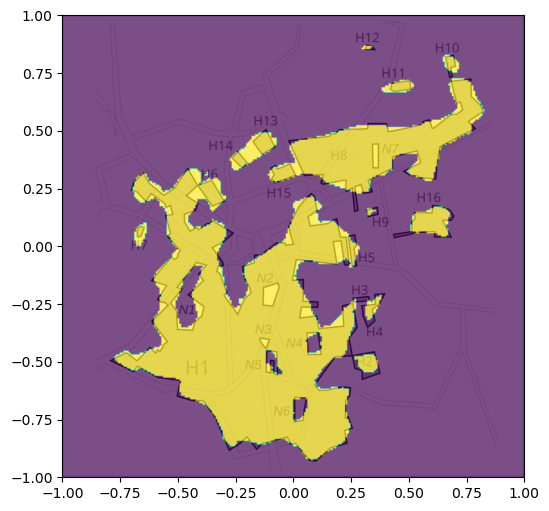

In [4]:
 ax, probe_logits=viz_descision_boundary(model)

In [5]:
with torch.no_grad():
    w1 = model.model[0].weight.cpu().numpy()  # Shape: [num_neurons, 2]
    b1 = model.model[0].bias.cpu().numpy()    # Shape: [num_neurons]

# for neuron_idx in range(50):
#     joint_points = get_relu_joint(w1[neuron_idx, 0], w1[neuron_idx, 1], b1[neuron_idx], extent=1)

In [6]:
# joint_points

<Figure size 640x480 with 0 Axes>

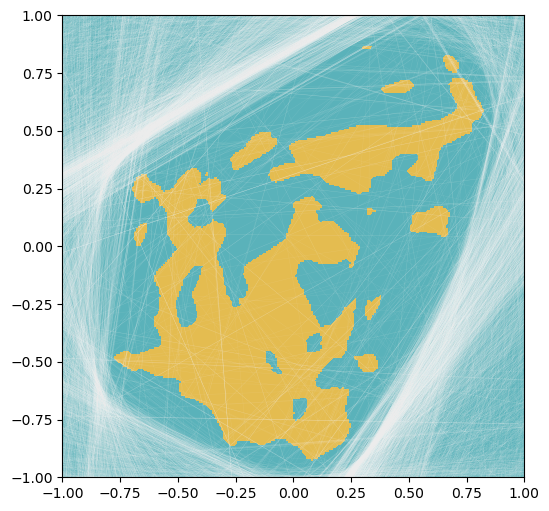

In [8]:
import matplotlib.colors as mcolors
YELLOW = '#ffd35a'
BLUE = '#65c8d0'
custom_cmap = mcolors.ListedColormap([BLUE, YELLOW])

plt.clf()
fig=plt.figure(0,(6,6))
ax=fig.add_subplot(111)
ax.set_facecolor('black')
ax.imshow(np.flipud(np.argmax(probe_logits,2)), 
           extent=[-1, 1, -1, 1],  # This maps to image coordinates
           alpha=0.9, #Hmm this is against a white background...
           cmap=custom_cmap)
          
for neuron_idx in range(w1.shape[0]):
    jp = get_relu_joint(w1[neuron_idx, 0], w1[neuron_idx, 1], b1[neuron_idx], extent=1)
    if len(jp)>0: 
        # plt.plot([jp[0][0], jp[1][0]], [jp[0][1], jp[1][1]], color='w', alpha=0.3, linewidth=0.8)
        plt.plot([jp[0][0], jp[1][0]], [jp[0][1], jp[1][1]], color='w', alpha=0.1, linewidth=0.3)  

In [ ]:
from smoother_border_finding import *

In [ ]:
contours_interp = find_smooth_contours(
    boolean_img,
    min_contour_area=1,
    gaussian_sigma=0.1,
    method='subsample',
    num_points=100
)

In [22]:
jp

[]

In [28]:
w1.shape[0]

1024